In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, Normalize

def convoy(t,Z, N, b, c, T, v_f):
    A = np.array([[0, 1], [-c, -b]])
    B = np.array([[0, 0], [c, b - c * T]])
    M = np.zeros((2 * N, 2 * N))
    for i in range(N - 1):
        M[2 * i:2 * i + 2, 2 * i:2 * i + 2] = A 
        M[2 * i:2 * i + 2, 2 * i + 2:2 * i + 4] = B
    M[2 * (N - 1):2 * N, 2 * (N - 1):2 * N] = A
    F = np.zeros(2 * N)
    F[2 * (N-1) + 1] = c * T * v_f
    return M.dot(Z) + F

def simulate_convoy(N, b, c, T, t_end):
    initial_spacing = 30
    initial_velocity = 20
    v_f = initial_velocity
    Z0 = np.zeros(2 * N)
    Z0[0::2] = initial_spacing * np.ones(N)
    Z0[1::2] = np.zeros(N)

    t = np.linspace(0, t_end, 300)
    solution = solve_ivp(convoy, [0, t_end], Z0, args=(N, b, c, T, v_f),t_eval=t, dense_output=True)
    Z = solution.y
    return t, Z


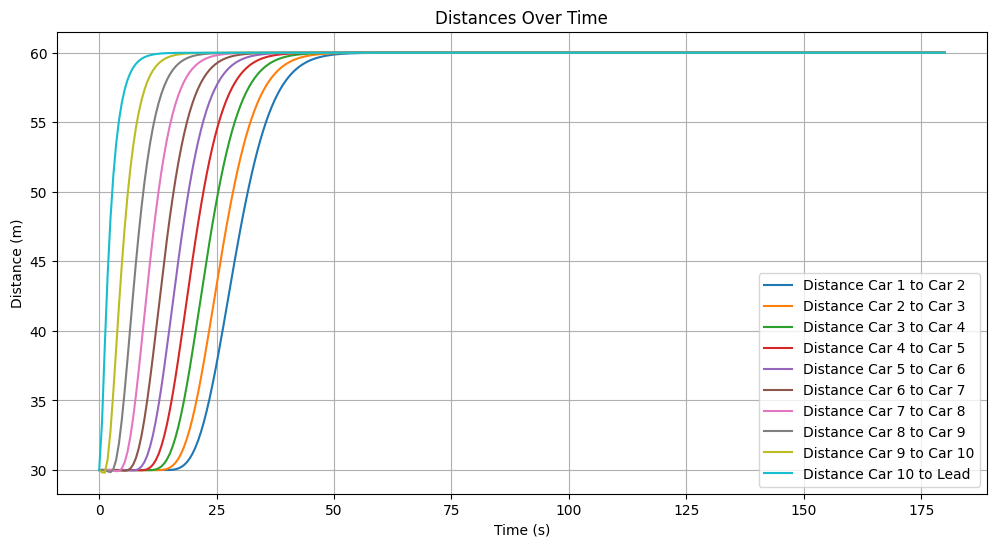

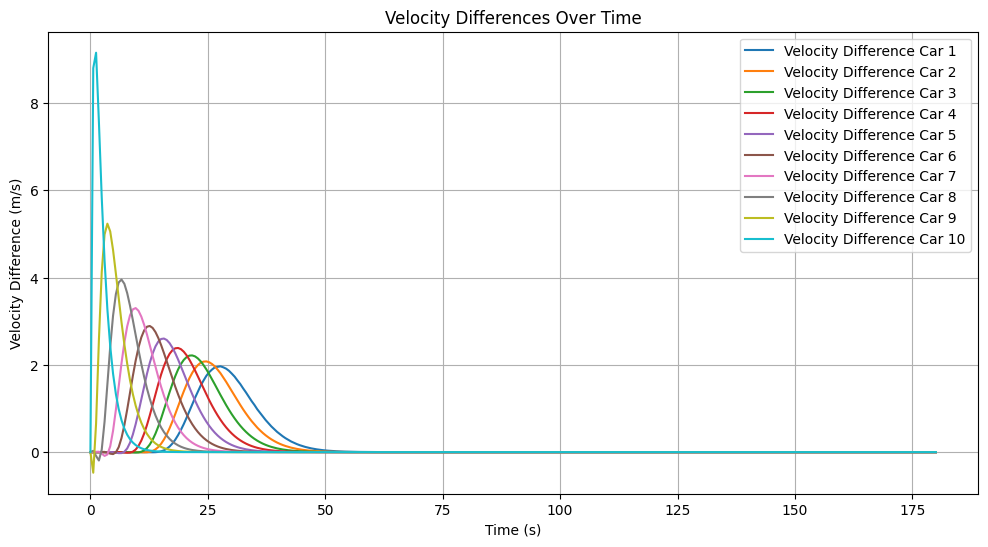

In [2]:
# Parameters for simulation
N = 10
b = 2.5
c = 1
T = 3
t_end = 180

# Run the simulation
t, Z = simulate_convoy(N, b, c, T, t_end)
# Plotting the results for distances
plt.figure(figsize=(12, 6))
for i in range(N):

    plt.plot(t, Z[2*i], label=f'Distance Car {i+1} to Car {i+2}' if i < N-1 else f'Distance Car {i+1} to Lead')
plt.title('Distances Over Time')
plt.xlabel('Time (s)')
plt.ylabel('Distance (m)')
plt.legend()
plt.grid(True)
plt.show()

# Plotting the results for velocity differences
plt.figure(figsize=(12, 6))
for i in range(N):
    plt.plot(t, Z[2*i+1], label=f'Velocity Difference Car {i+1}')
plt.title('Velocity Differences Over Time')
plt.xlabel('Time (s)')
plt.ylabel('Velocity Difference (m/s)')
plt.legend()
plt.grid(True)
plt.show()

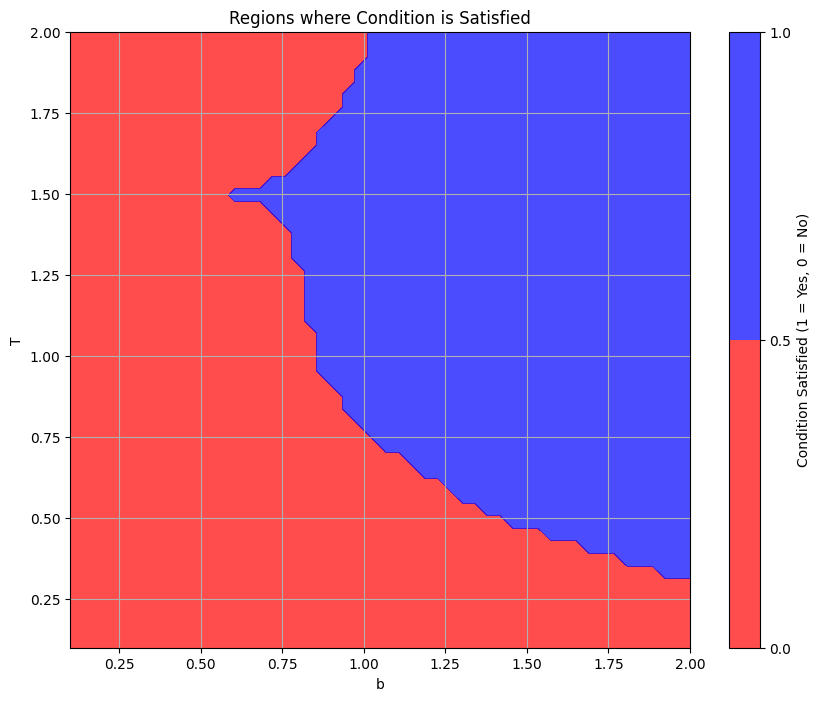

In [3]:
N = 10
c = 1
b_values = np.linspace(0.1, 2, 50)  # Range of b
T_values = np.linspace(0.1, 2, 50)  # Range of T
t_end = 60

# Initialize a matrix to store results
results = np.zeros((len(b_values), len(T_values)))

# Analyze for each combination of b and T
for i, b in enumerate(b_values):
    for j, T in enumerate(T_values):
        t, Z = simulate_convoy(N, b, c, T, t_end)
        # Check a condition, e.g., if all distances remain positive
        distances = Z[0::2]  # Extract distances from solution
        if np.all(distances > 0):  # Condition: All distances > 0
            results[i, j] = 1  # Mark as satisfying the condition

# Plot the results
B, T = np.meshgrid(b_values, T_values)
plt.figure(figsize=(10, 8))
plt.contourf(B, T, results.T, levels=[0, 0.5, 1], colors=['red', 'blue'], alpha=0.7)
plt.colorbar(label="Condition Satisfied (1 = Yes, 0 = No)")
plt.title("Regions where Condition is Satisfied")
plt.xlabel("b")
plt.ylabel("T")
plt.grid(True)
plt.show()


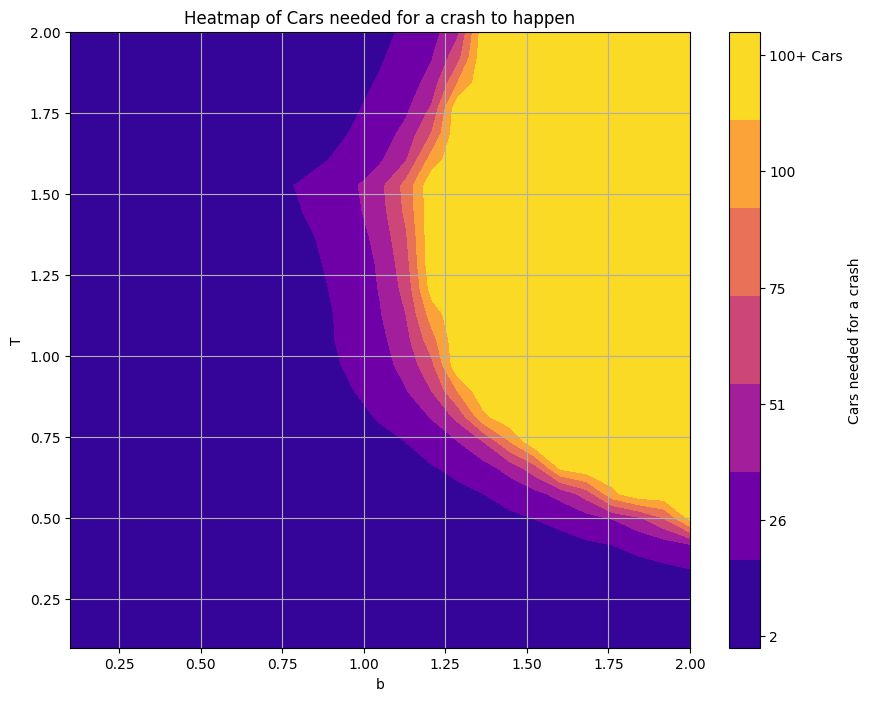

In [418]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, Normalize

# Parameters for analysis
N = 100
c = 1
b_values = np.linspace(0.1, 2, 25)
T_values = np.linspace(0.1, 2, 25)
t_end = 300

# Initialize results with N+1 for no crashes
results = np.full((len(b_values), len(T_values)), N+1)

# Simulate and analyze crashes
for i, b in enumerate(b_values):
    for j, T in enumerate(T_values):
        t, Z = simulate_convoy(N, b, c, T, t_end)
        distances = Z[0::2]
        if np.any(distances <= 0):
            crashed = np.where(distances <= 0)[0]
            results[i, j] = N - crashed[-1] + 1  # Index of the first car to crash

# Custom colormap: modify plasma to include green for 'N+1'
cmap = plt.cm.plasma


# Normalize including N+1 and ensure it maps exactly to green

B, T = np.meshgrid(b_values, T_values)
plt.figure(figsize=(10, 8))
contour = plt.contourf(B, T, results.T, cmap=cmap)
cbar = plt.colorbar(contour, label="Cars needed for a crash", ticks=np.linspace(np.min(results), N+1, num=6))
cbar.set_ticklabels([f"{int(x)}" for x in np.linspace(np.min(results), N, num=5)] + ['100+ Cars'])
plt.title("Heatmap of Cars needed for a crash to happen")
plt.xlabel("b")
plt.ylabel("T")
plt.grid(True)
plt.show()


KeyboardInterrupt: 

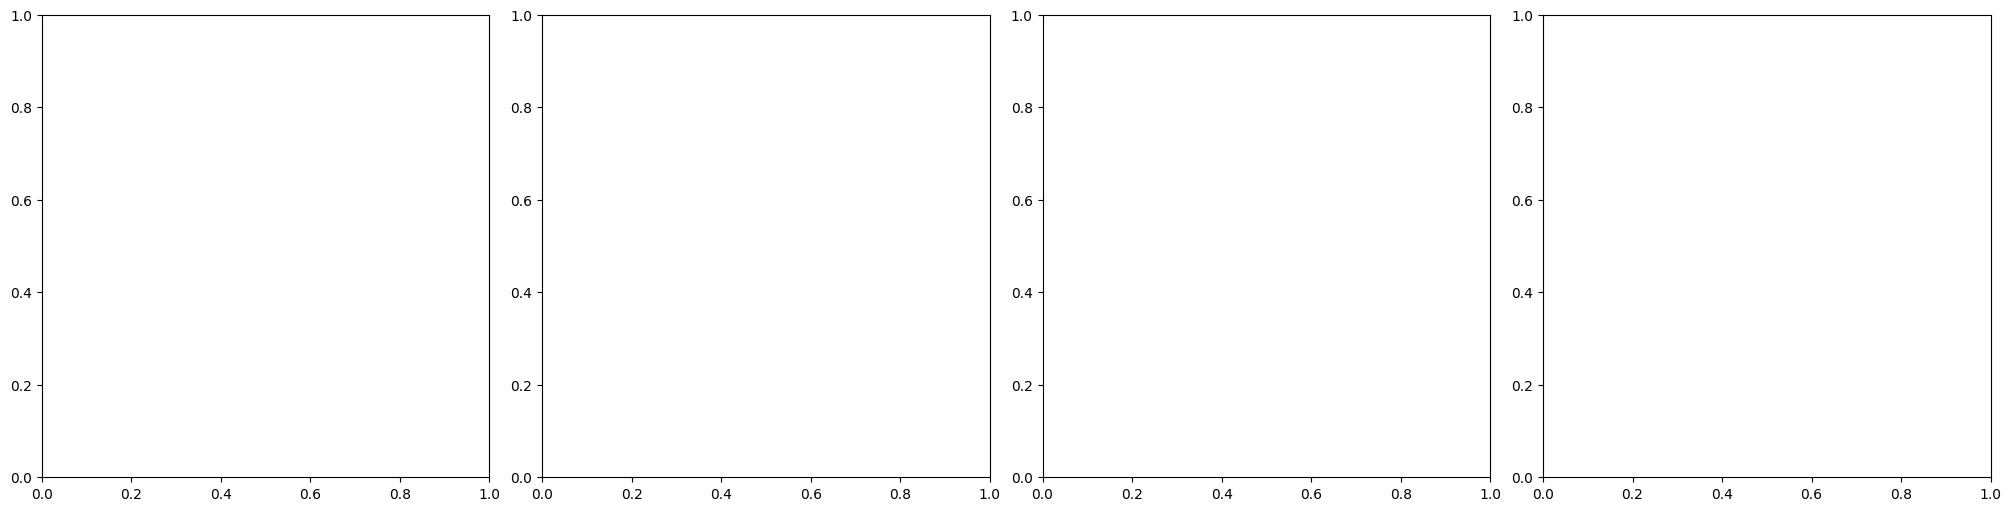

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Parameters for the analysis
N = 50  # Large N to capture behavior
c = 1
b_values = np.linspace(0.1, 2, 15)  # Range of b
T_values = np.linspace(0.1, 2, 15)  # Range of T
t_end_values = [60, 120, 180, 300]  # Different t_end values

# Create subplots for different t_end values
fig, axes = plt.subplots(1, 4, figsize=(20, 5), constrained_layout=True)

for idx, t_end in enumerate(t_end_values):
    results = np.zeros((len(b_values), len(T_values)))

    # Analyze for each combination of b and T
    for i, b in enumerate(b_values):
        for j, T in enumerate(T_values):
            t, Z = simulate_convoy(N, b, c, T, t_end)
            distances = Z[0::2]  # Extract distances from solution
            # Find the first car to crash (distance <= 0)
            crashed = np.where(np.any(distances <= 0, axis=1))[0]
            if len(crashed) > 0:
                results[i, j] = crashed[0] + 1  # Index of the first car to crash

    # Plot the heatmap for this t_end
    B, T = np.meshgrid(b_values, T_values)
    ax = axes[idx]
    heatmap = ax.contourf(B, T, results.T, cmap='viridis', levels=50)
    ax.set_title(f"t_end = {t_end}s")
    ax.set_xlabel("b")
    ax.set_ylabel("T")
    fig.colorbar(heatmap, ax=ax, label="Index of First Car to Crash")

plt.show()


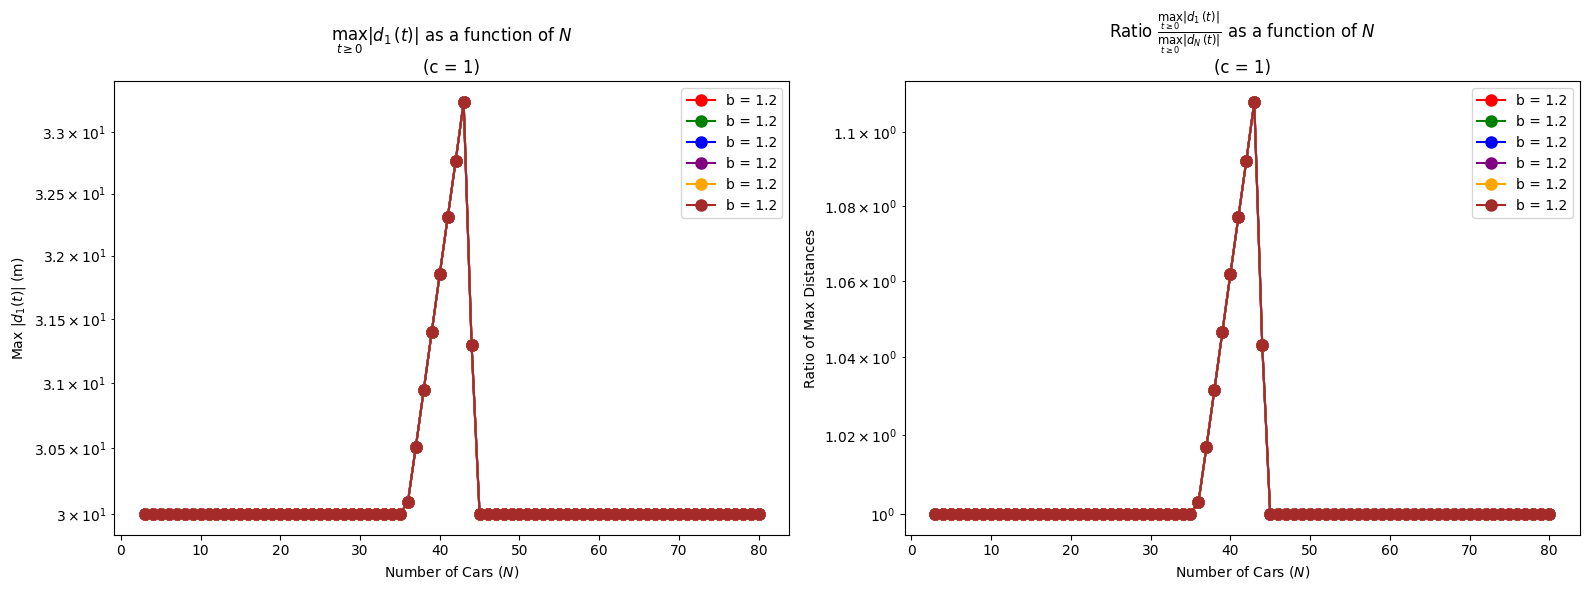

In [5]:
N_range = range(3, 81)  # Range of N values
b_values = [1.2, 1.2, 1.2, 1.2, 1.2, 1.2]  # Different values of b to plot

# Create the plots
fig, (ax2, ax1) = plt.subplots(1, 2, figsize=(16, 6))
c= 1
T = 1

colors = ['red', 'green', 'blue', 'purple', 'orange', 'brown']
for b, color in zip(b_values, colors):
    max_d1_values = []
    max_dN_values = []
    for N in N_range:
        t, Z = simulate_convoy(N, b, c, T, t_end)
        max_d1 = np.max((Z[0]))
        max_dN = np.max((Z[2 * (N - 1)]))
        max_d1_values.append(max_d1)
        max_dN_values.append(max_dN)

    ratio = np.array(max_d1_values) / np.array(max_dN_values)

    # Plot max |d1(t)| for each b
    ax2.plot(list(N_range), max_d1_values, marker='o', linestyle='-', color=color, markersize=8, label=f'b = {b}')
    ax2.set_yscale('log')  # Set logarithmic scale
    
    # Plot the ratio for each b
    ax1.plot(list(N_range), ratio, marker='o', linestyle='-', color=color, markersize=8, label=f'b = {b}')
    ax1.set_yscale('log')  # Set logarithmic scale

# Setting titles and labels for ax2
ax2.set_title(r'$\max_{t \geq 0} |d_1(t)|$ as a function of $N$' + f'\n(c = {c})')
ax2.set_xlabel('Number of Cars ($N$)')
ax2.set_ylabel('Max $|d_1(t)|$ (m)')
ax2.legend()

# Setting titles and labels for ax1
ax1.set_title(r'Ratio $\frac{\max_{t \geq 0} |d_1(t)|}{\max_{t \geq 0} |d_N(t)|}$ as a function of $N$' + f'\n(c = {c})')
ax1.set_xlabel('Number of Cars ($N$)')
ax1.set_ylabel('Ratio of Max Distances')
ax1.legend()

plt.tight_layout()
plt.show()


In [264]:
N_range = range(3, 81)  # Range of N values
b_values = np.linspace(0, 1.2, 13)  # Increment by 0.1 to cover 0 to 1.2

Ns = []
max_max_d1 = []
for b in b_values:
    highest_d1 = 0
    best_N = 0
    max_d1_values = []
    max_dN_values = []
    for N in N_range:
        t, Z = simulate_convoy(N, b, c, T, t_end)
        max_d1 = np.max(np.abs(Z[0]))
        max_dN = np.max(np.abs(Z[2 * (N - 1)]))
        max_d1_values.append(max_d1)
        max_dN_values.append(max_dN)
        if max_d1 > highest_d1:
            highest_d1 = max_d1
            best_N = N
    Ns.append(best_N)
    max_max_d1.append(highest_d1)


plt.plot(b_values, Ns, marker='o', linestyle='-', color='blue', markersize=8)
plt.xlabel('b')
plt.ylabel('N')
plt.title('N where max d_1 is the highest as a function of b')

KeyboardInterrupt: 

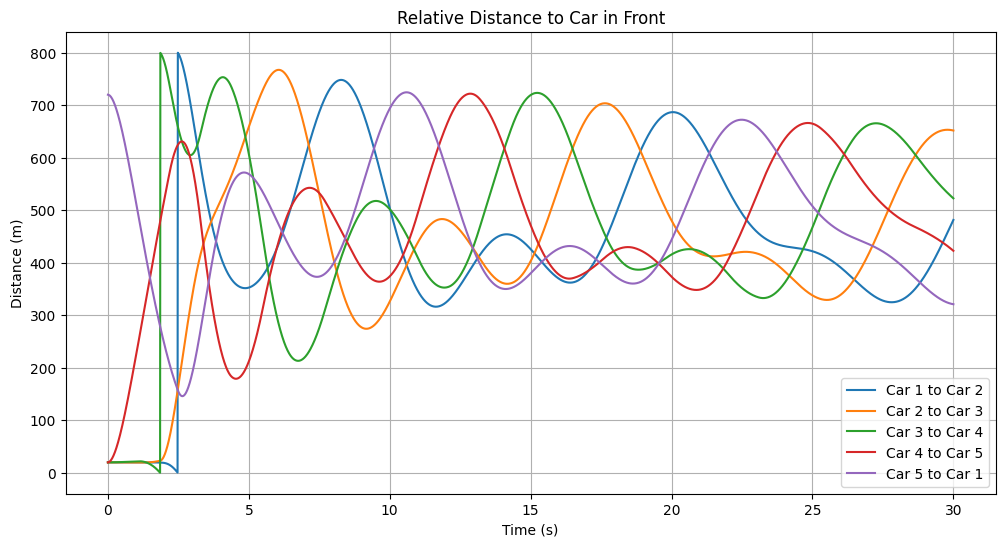

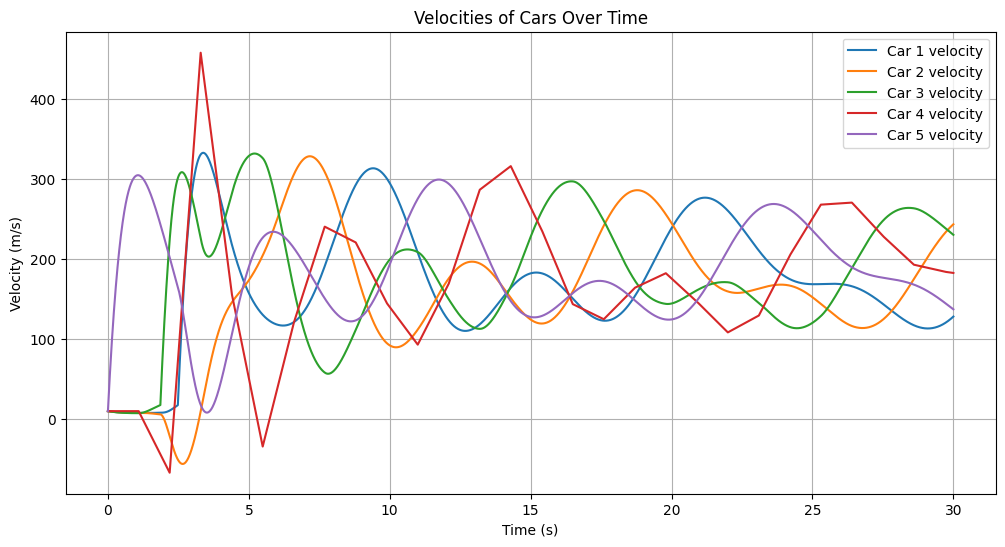

C:\Users\welin\AppData\Local\Temp\ipykernel_17896\3169529157.py:157: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  distracted_marker.set_data(x_distracted, y_distracted)


Animation saved as 'cars_on_ring_distracted_T26_B16.gif'.


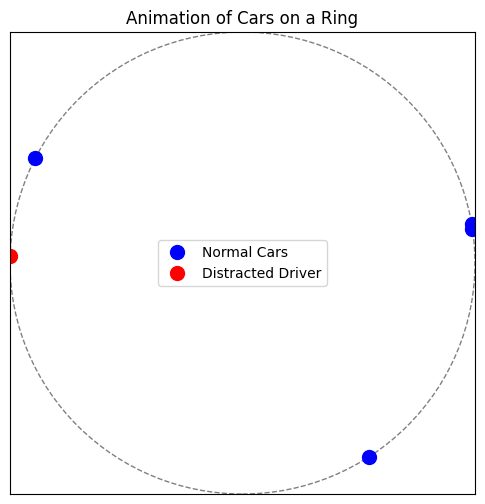

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Parameters
N = 5  # Number of autonomous cars
b = 1.6  # Proportional gain
c = 1.0  # Derivative gain
T = 2.6  # Desired time interval
ring_length = 800  # Length of the ring
dt = 0.01  # Time step
t_max = 30  # Maximum simulation time
distracted_driver_index = 3  
distracted_interval = 1.1

# Set initial positions and velocities
z0 = np.zeros(2 * N)

# Set initial positions
z0 = np.zeros(2 * N)

# Assign initial positions where each car (except the first) is 20 meters apart
z0[2:(2 * N):2] = np.arange(20, 20 * N, 20)
z0[0] = ring_length  # First car wraps around the ring
# Assign initial velocities
z0[1::2] = 10  # Uniform initial velocity for all cars


# Euler integration for the car-following model
def simulate_traffic(z0, dt, t_max, ring_length, distracted_driver_index, distracted_interval):
    n_steps = int(t_max / dt)
    n_states = len(z0)
    distracted_driver_vel_idx = 2 * distracted_driver_index + 1  # Velocity index of distracted driver

    t = np.linspace(0, t_max, n_steps)
    z = np.zeros((n_steps, n_states))
    z[0] = z0

    distracted_update_step = int(distracted_interval / dt)

    # Store distracted driver's acceleration between updates
    distracted_driver_acc = 0

    for i in range(1, n_steps):
        z_next = np.copy(z[i - 1])

        for j in range(N):
            pos_idx = 2 * j
            vel_idx = pos_idx + 1

            # Get the position and velocity of the current and front car
            pos = z[i - 1][pos_idx]
            vel = z[i - 1][vel_idx]
            pos_front = z[i - 1][(pos_idx + 2) % (2 * N)]
            vel_front = z[i - 1][(vel_idx + 2) % (2 * N)]

            # Compute the actual and desired distance
            d = (pos_front - pos) % ring_length  # Distance to front car
            d_d = vel_front * T  # Desired distance

            # Calculate acceleration
            acc = b * (vel_front - vel) + c * (d - d_d)

            # Apply acceleration logic for distracted driver
            if j == distracted_driver_index:
                if i % distracted_update_step == 0:
                    distracted_driver_acc = acc  # Update acceleration at interval
                acc = distracted_driver_acc  # Apply constant acceleration until next update

            # Update velocity and position
            z_next[vel_idx] += dt * acc
            z_next[pos_idx] += dt * z_next[vel_idx]
            z_next[pos_idx] = z_next[pos_idx] % ring_length  # Ensure circular movement

        z[i] = z_next

    return t, z


# Run the simulation
t, z = simulate_traffic(z0, dt, t_max, ring_length, distracted_driver_index, distracted_interval)

# Extract positions and velocities
positions = z[:, ::2]
velocities = z[:, 1::2]

# Compute relative distances to the car in front
relative_distances = np.zeros_like(positions)
for i in range(N):
    relative_distances[:, i] = (positions[:, (i + 1) % N] - positions[:, i]) % ring_length

# Plot results
plt.figure(figsize=(12, 6))

# Plot distances
for i in range(N):
    plt.plot(t, relative_distances[:, i], label=f"Car {i+1} to Car {(i+2) if i+1 < N else 1}")
plt.title("Relative Distance to Car in Front")
plt.xlabel("Time (s)")
plt.ylabel("Distance (m)")
plt.legend()
plt.grid()
plt.show()

# Plot velocities
plt.figure(figsize=(12, 6))
for i in range(N):
    plt.plot(t, velocities[:, i], label=f"Car {i+1} velocity")
plt.title("Velocities of Cars Over Time")
plt.xlabel("Time (s)")
plt.ylabel("Velocity (m/s)")
plt.legend()
plt.grid()
plt.show()

# Animation of cars on a ring with GIF saving
def animate_cars():
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.set_xlim(-ring_length / 2, ring_length / 2)
    ax.set_ylim(-ring_length / 2, ring_length / 2)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title("Animation of Cars on a Ring")

    # Draw the ring
    circle = plt.Circle((0, 0), ring_length / 2, color='gray', fill=False, linestyle='--')
    ax.add_artist(circle)

    # Convert positions to angles on a ring
    def positions_to_ring(positions):
        angles = (positions / ring_length) * 2 * np.pi
        x = (ring_length / 2) * np.cos(angles)
        y = (ring_length / 2) * np.sin(angles)
        return x, y

    # Normal cars in blue, distracted driver in red
    car_markers, = ax.plot([], [], 'bo', markersize=10, label="Normal Cars")
    distracted_marker, = ax.plot([], [], 'ro', markersize=10, label="Distracted Driver")

    legend = ax.legend()

    def init():
        car_markers.set_data([], [])
        distracted_marker.set_data([], [])
        return car_markers, distracted_marker, legend

    def update(frame):
        x, y = positions_to_ring(positions[frame])
        
        # Split normal and distracted driver positions
        x_normal = np.delete(x, distracted_driver_index)
        y_normal = np.delete(y, distracted_driver_index)
        x_distracted = x[distracted_driver_index]
        y_distracted = y[distracted_driver_index]

        car_markers.set_data(x_normal, y_normal)
        distracted_marker.set_data(x_distracted, y_distracted)

        ax.legend(loc=10)  # Force redraw of legend for every frame
        return car_markers, distracted_marker, legend

    ani = animation.FuncAnimation(fig, update, frames=len(t), init_func=init, blit=True, interval=dt * 50)

    # Save the animation as a GIF with legend
    gif_filename = "cars_on_ring_distracted_T26_B16.gif"
    ani.save(gif_filename, writer=animation.PillowWriter(fps=30))
    print(f"Animation saved as '{gif_filename}'.")

    plt.show()

# Run the animation and save it as a GIF
animate_cars()


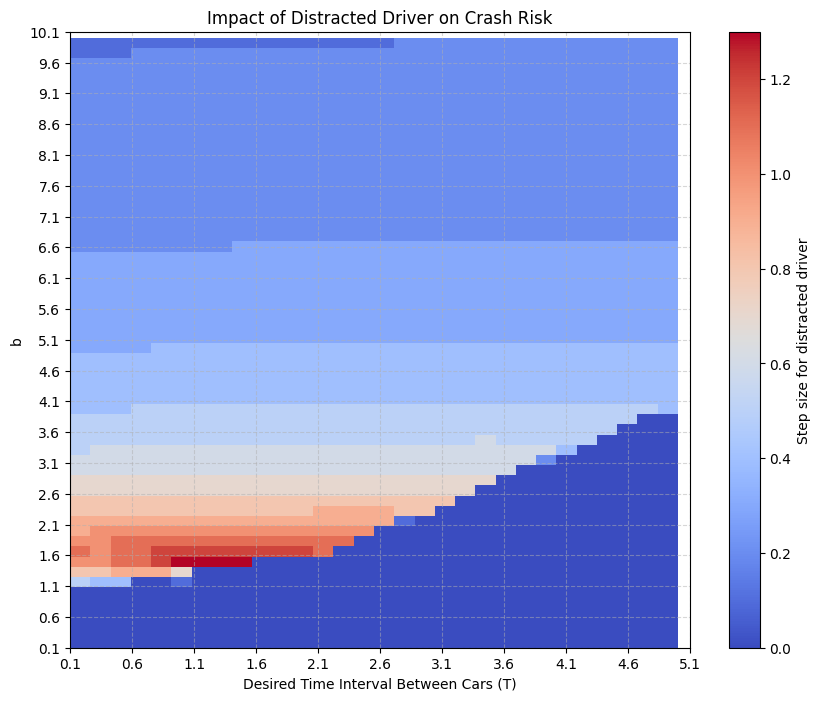

In [23]:
    import numpy as np
    import matplotlib.pyplot as plt

    # Simulation parameters
    N = 5  # Number of autonomous cars
    c= 1
    ring_length = 800  # Length of the ring
    dt = 0.01  # Time step
    t_max = 60  # Maximum simulation time
    distracted_driver_index = 3  
    crash_distance_threshold = 1  # Minimum safe distance before considering it a crash

    # Set initial positions and velocities
    z0 = np.zeros(2 * N)
    z0[2:(2 * N):2] = np.arange(20, 20 * N, 20)
    z0[0] = ring_length  # First car wraps around the ring
    z0[1::2] = 10  # Uniform initial velocity for all cars

    # Function to simulate traffic and check for crashes
    def simulate_and_check_crash(z0, dt, t_max, ring_length, b, c, T, distracted_driver_index, distracted_interval):
        n_steps = int(t_max / dt)
        distracted_driver_vel_idx = 2 * distracted_driver_index + 1  # Velocity index of distracted driver

        z = np.zeros((n_steps, len(z0)))
        z[0] = z0
        distracted_driver_acc = 0
        distracted_update_step = int(distracted_interval / dt)

        for i in range(1, n_steps):
            z_next = np.copy(z[i - 1])

            for j in range(N):
                pos_idx = 2 * j
                vel_idx = pos_idx + 1

                # Get current and front car data
                pos = z[i - 1][pos_idx]
                vel = z[i - 1][vel_idx]
                pos_front = z[i - 1][(pos_idx + 2) % (2 * N)]
                vel_front = z[i - 1][(vel_idx + 2) % (2 * N)]

                # Compute actual and desired distance
                d = (pos_front - pos) % ring_length  # Distance to front car
                d_d = vel_front * T  # Desired distance

                # Compute acceleration
                acc = b * (vel_front - vel) + c * (d - d_d)

                # Apply distracted driver logic
                if j == distracted_driver_index:
                    if i % distracted_update_step == 0:
                        distracted_driver_acc = acc  # Update acceleration at interval
                    acc = distracted_driver_acc  # Keep acceleration constant

                # Update velocity and position
                z_next[vel_idx] += dt * acc
                z_next[pos_idx] += dt * z_next[vel_idx]
                z_next[pos_idx] = z_next[pos_idx] % ring_length  # Ensure circular movement

                # Check for crashes
                if d < crash_distance_threshold:
                    return True  # Crash occurred

            z[i] = z_next

        return False  # No crash occurred


    # Parameter ranges for b and T
    b_values = np.linspace(0.1, 10.0, 60)  # Range of proportional gain
    T_values = np.linspace(0.1, 5.0, 30)  # Range of desired time intervals

    # Heatmap data
    heatmap = np.zeros((len(b_values), len(T_values)))

    for i, b in enumerate(b_values):
        for j, T in enumerate(T_values):
            distracted_interval = 0.1  # Start with a small distracted interval
            max_distracted_interval = 0

            # Increase distracted interval until crash occurs
            while not simulate_and_check_crash(z0, dt, t_max, ring_length, b, c, T, distracted_driver_index, distracted_interval):
                max_distracted_interval = distracted_interval
                distracted_interval += 0.1  # Increase interval

                if distracted_interval > 4:  # Avoid infinite loop
                    break

            heatmap[i, j] = max_distracted_interval

    # Plot heatmap
    plt.figure(figsize=(10, 8))
    plt.imshow(heatmap, extent=[T_values.min(), T_values.max(), b_values.min(), b_values.max()], origin='lower', aspect='auto', cmap='coolwarm')
    plt.colorbar(label="Step size for distracted driver")
    plt.xlabel("Desired Time Interval Between Cars (T)")
    plt.ylabel("b")
    plt.title("Impact of Distracted Driver on Crash Risk")
    tick_interval = 0.5
    plt.xticks(np.arange(T_values.min(), T_values.max() + tick_interval, tick_interval))
    plt.yticks(np.arange(b_values.min(), b_values.max() + tick_interval, tick_interval))
    plt.grid(True, which='both', linestyle='--', alpha=0.5)
    plt.show()
